In [1]:
from sklearn.preprocessing import StandardScaler
from numpy import *
from numpy.linalg import *
import numpy as np
import pandas as pd
import plotly
import plotly.offline as py
import operator
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plotly.offline.init_notebook_mode(connected=True)

In [2]:
PCA_A = pd.read_csv('pca_a.txt', header = None, delimiter="\t")
PCA_B = pd.read_csv('pca_b.txt', header = None, delimiter="\t")
PCA_C = pd.read_csv('pca_c.txt', header = None, delimiter="\t")
Data = pd.read_csv('pca_demo.txt', header = None, delimiter="\t")

##### Functions

In [3]:
def PCA(Data, dimension, colors):
    print(Data.tail())
    X = Data.iloc[:, :dimension].values
    y = Data.iloc[:, dimension].values
    diseases = np.unique(y)
    print(diseases)
    X_std = StandardScaler().fit_transform(X)
    mean_vec = np.mean(X_std, axis=0)
    cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    print(eig_vals)
    print(eig_vecs)
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort()
    eig_pairs.reverse()

    # Visually confirm that the list is correctly sorted by decreasing eigenvalues
    print('Eigenvalues in descending order:')
    for i in eig_pairs:
        print(i[0])
    matrix_w = np.hstack((eig_pairs[0][1].reshape(dimension,1), 
                      eig_pairs[1][1].reshape(dimension,1)))

    print('Matrix W:\n', matrix_w)
    Y = X_std.dot(matrix_w)
    data = []
    for name, col in zip(diseases, colors.values()):
        trace = dict( type = 'scatter',
                     x = Y[y==name,0],
                     y = Y[y==name,1], mode='markers', name=name,
            marker=dict( color=col, size=12, line=dict( color='rgba(217, 217, 217, 0.14)',width=0.5),opacity=0.8)
                )
        data.append(trace)

    layout = dict(
        showlegend=True,
        scene=dict(
            xaxis=dict(title='PC1'),
            yaxis=dict(title='PC2')
        )
    )

    fig = dict(data=data, layout=layout)
    py.iplot(fig, filename='projection-matrix')

## PCA
### A DataSet

In [4]:
colors = {'Arrhythmia': '#0D76BF', 'Asthma': '#00cc96', 'Hypertension': '#EF553B'}
PCA(PCA_A, 4, colors)

       0    1    2    3             4
145  2.6  4.4  1.4  6.4        Asthma
146  2.7  4.4  1.7  5.9        Asthma
147  3.2  6.0  2.5  6.8    Arrhythmia
148  3.5  1.9  0.5  5.3  Hypertension
149  3.6  1.7  0.6  5.1  Hypertension
['Arrhythmia' 'Asthma' 'Hypertension']
[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.26335492 -0.92555649 -0.24203288  0.12413481]
 [-0.58125401 -0.02109478 -0.14089226  0.80115427]
 [-0.56561105 -0.06541577 -0.6338014  -0.52354627]
 [-0.52237162 -0.37231836  0.72101681 -0.26199559]]
Eigenvalues in descending order:
2.930353775589316
0.9274036215173409
0.1483422264816397
0.02074601399559508
Matrix W:
 [[ 0.26335492 -0.92555649]
 [-0.58125401 -0.02109478]
 [-0.56561105 -0.06541577]
 [-0.52237162 -0.37231836]]


### B DataSet

In [5]:
colors = {'CA': '#0D76BF', 'CD': '#00cc96', 'HVD': '#EF553B','Septic': '#E904FC','TB': '#FCF904'}
PCA(PCA_B, 16, colors)

       0     1     2     3     4     5     6     7     8     9     10    11  \
381 -0.04  1.15  1.14  1.08 -0.44  0.85  0.79  0.37  1.37  0.56  0.05  0.46   
382 -0.49  0.84  0.90  0.74 -0.56  2.29  0.21 -0.60  1.22  0.13 -0.82  0.19   
383  0.66  0.26  0.16  0.57  0.45  0.05  0.31  0.23  0.08  0.56  0.58  0.84   
384  0.23  0.69  0.75  0.54  0.18  1.30  0.55  0.24  0.64  0.33  0.08  0.94   
385  0.40  0.38  0.43  0.48  0.32 -0.24  0.64  0.92  0.17  0.49  0.60  0.40   

       12    13    14    15      16  
381 -0.08 -0.08  1.23 -0.54      CD  
382  0.13  1.28  2.01 -1.14  Septic  
383 -0.08  0.79  0.05  0.39  Septic  
384  0.12 -1.02  0.93  0.38      CD  
385  0.50  0.38 -0.54  1.08     HVD  
['CA' 'CD' 'HVD' 'Septic' 'TB']
[6.6132069  3.18007885 2.12130785 0.8721732  0.72536609 0.50430594
 0.41385497 0.02240051 0.34872383 0.07008648 0.09664672 0.14378813
 0.17318181 0.20140946 0.25349182 0.30153589]
[[ 0.25831384 -0.27360273 -0.16256133 -0.16108391  0.03508247  0.53224577
   0.072615

### C DataSet

In [6]:
colors = {'ALL': '#0D76BF', 'AML': '#00cc96', 'Breast Cancer': '#EF553B','COPD': '#E904FC', 'Colen Cancer': '#FCF904','Diabetes': '#0FBBF1','Obesity': '#ACF907',}
PCA(PCA_C, 11, colors)

       0     1     2     3     4     5     6     7     8     9     10  \
423  2.43  2.32  1.31  1.17  1.10  2.13  3.11  1.18  1.19  1.26  1.18   
424  0.86  0.69  0.62  1.30  0.63  0.57  1.18  1.20  1.44  0.59  1.45   
425  0.92  0.85  0.91  1.51  1.01  0.72  1.00  1.43  1.16  0.73  1.20   
426  3.50  3.21  1.51  1.11  1.56  1.59  4.74  1.27  1.19  1.51  2.11   
427  0.79  0.80  1.10  1.34  1.34  0.86  0.94  0.99  1.17  0.99  1.10   

                11  
423  Breast Cancer  
424           COPD  
425       Diabetes  
426  Breast Cancer  
427        Obesity  
['ALL' 'AML' 'Breast Cancer' 'COPD' 'Colen Cancer' 'Diabetes' 'Obesity']
[4.9890946  2.48471765 1.70015343 0.55265179 0.46525928 0.35579592
 0.19077071 0.14915763 0.09117574 0.02213192 0.02485246]
[[-0.36614742 -0.03604788  0.38199068  0.06325688 -0.00682366  0.28075239
  -0.40179888  0.08098103  0.37511361  0.55544638 -0.13645027]
 [-0.38010968 -0.12531521  0.31776074  0.06038017  0.21434083 -0.08706987
  -0.40582302  0.11577681 -

## Demo

In [7]:
colors = {'ALL': '#0D76BF', 'AML': '#00cc96', 'Breast Cancer': '#EF553B','Colon Cancer': '#E904FC'}
dimension = 300

X = Data.iloc[:, :dimension].values
y = Data.iloc[:, dimension].values
diseases = np.unique(y)

X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Make a sorted list of (eigenvalue, eigenvector) tuples 
idx = eig_vals.argsort()[::-1]   
eigenValues = eig_vals[idx]
eigenVectors = eig_vecs[:,idx]

eig_pairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]

matrix_w = np.hstack((eig_pairs[0][1].reshape(dimension,1), eig_pairs[1][1].reshape(dimension,1)))

# Converting Complex matrix to real matrix by dropping complex part
matrix_w_r = [[0,0] for i in range(0,300)]
for i in range(0,300):
    for j in range(0,2):
        matrix_w_r[i][j] = matrix_w[i][j].real
matrix_w = matrix_w_r

Y = X_std.dot(matrix_w)

In [8]:
data = []
for name, col in zip(diseases, colors.values()):
    trace = dict( type = 'scatter',
                 x = Y[y==name,0],
                 y = Y[y==name,1], mode='markers', name=name,
        marker=dict( color=col, size=12, line=dict( color='rgba(217, 217, 217, 0.14)',width=0.5),opacity=0.8)
            )
    data.append(trace)

layout = dict(
    showlegend=True,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2')
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='projection-matrix')

## SVD

###### Function

In [9]:
def SVD(Data, dimensions, targets, colors):
    # Only the X variables
    data = Data.iloc[:, :dimensions].values
    #calculate SVD
    n = 2 # We will take two Singular Values
    U, s, V = linalg.svd(data)
    # eye() creates a matrix with ones on the diagonal and zeros elsewhere
    Sig = mat(eye(n)*s[:n])
    newdata = U[:,:n]
    newdata = pd.DataFrame(newdata)
    newdata.columns=['SVD1','SVD2']
    newdata.head()
    newdata['target'] = Data.iloc[:, dimensions].values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('SVD 1') 
    ax.set_ylabel('SVD 2') 
    ax.set_title('SVD') 


    for target, color in zip(targets,colors):
        indicesToKeep = newdata['target'] == target
        ax.scatter(newdata.loc[indicesToKeep, 'SVD1'], newdata.loc[indicesToKeep, 'SVD2'], c = color, s = 50)
    ax.legend(targets)
    ax.grid()

### A DataSet

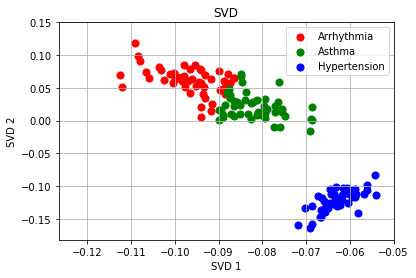

In [10]:
targets = ['Arrhythmia', 'Asthma', 'Hypertension']
colors = ['r', 'g', 'b']
SVD(PCA_A, 4, targets, colors)

### B DataSet

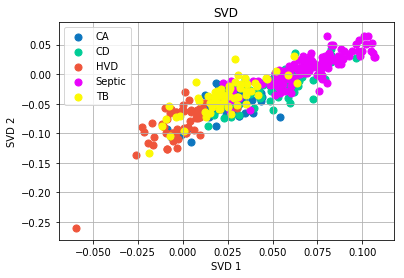

In [11]:
targets = ['CA', 'CD', 'HVD', 'Septic', 'TB']
colors = ['#0D76BF', '#00cc96', '#EF553B', '#E904FC', '#FCF904']
SVD(PCA_B, 16, targets, colors)

### C DataSet

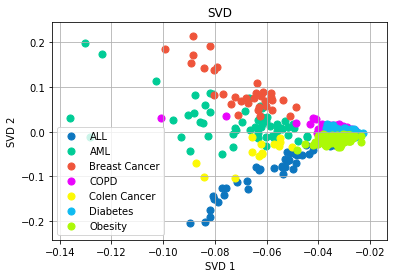

In [12]:
targets = ['ALL', 'AML', 'Breast Cancer', 'COPD', 'Colen Cancer', 'Diabetes', 'Obesity']
colors = ['#0D76BF', '#00cc96', '#EF553B', '#E904FC', '#FCF904', '#0FBBF1', '#ACF907'] 
SVD(PCA_C, 11, targets, colors)

## Demo

In [13]:
Data = pd.read_csv('pca_demo.txt', header = None, delimiter="\t")

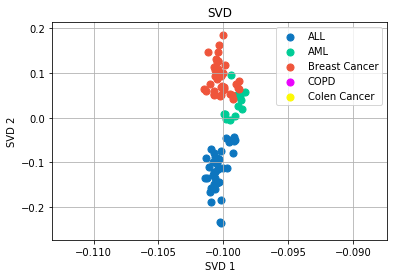

In [14]:
targets = ['ALL', 'AML', 'Breast Cancer', 'COPD', 'Colen Cancer']
colors = ['#0D76BF', '#00cc96', '#EF553B', '#E904FC', '#FCF904'] 
SVD(Data, 300, targets, colors)

## T - SNE
##### Function

In [15]:
def SNE(Data, dimension, diagnosis, targets, colors):
    y = pd.factorize(Data.iloc[:, dimension].values)
    y = y[0]
    X = Data.iloc[:, :dimension].values
    X_tsne = TSNE(learning_rate=100).fit_transform(X)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1,2,1) 
    ax.set_xlabel('SNE 1') 
    ax.set_ylabel('SNE 2') 
    ax.set_title('SNE') 
    for target, color in zip(targets,colors):
        indicesToKeep = y == target
        ax.scatter(X_tsne[indicesToKeep, 0], X_tsne[indicesToKeep, 1], c = color, s = 50)
    ax.legend(diagnosis)
    ax.grid()

### A Dataset

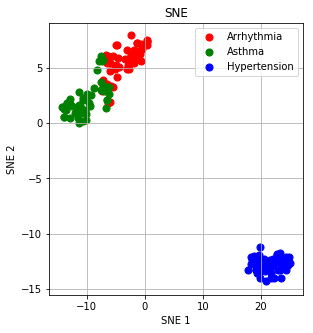

In [16]:
diagnosis = ['Arrhythmia', 'Asthma', 'Hypertension']
targets = [0,1,2]
colors = ['r', 'g', 'b']
SNE(PCA_A, 4, diagnosis, targets, colors)

### B Dataset

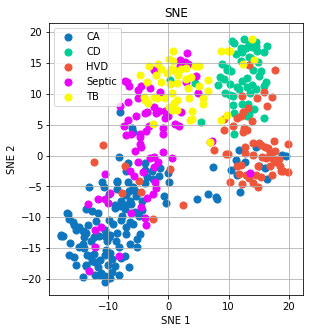

In [17]:
targets = [0,1,2,3,4]
diagnosis = ['CA', 'CD', 'HVD', 'Septic', 'TB']
colors = ['#0D76BF', '#00cc96', '#EF553B', '#E904FC', '#FCF904']
SNE(PCA_B, 16, diagnosis, targets, colors)

### C Dataset

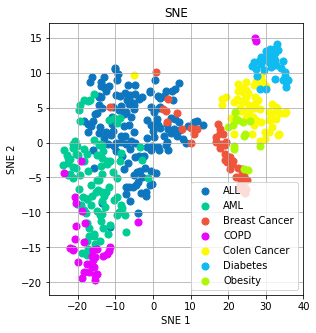

In [18]:
targets = [0,1,2,3,4,5,6]
diagnosis = ['ALL', 'AML', 'Breast Cancer', 'COPD', 'Colen Cancer', 'Diabetes', 'Obesity']
colors = ['#0D76BF', '#00cc96', '#EF553B', '#E904FC', '#FCF904', '#0FBBF1', '#ACF907'] 
SNE(PCA_C, 11, diagnosis, targets, colors)

### Demo

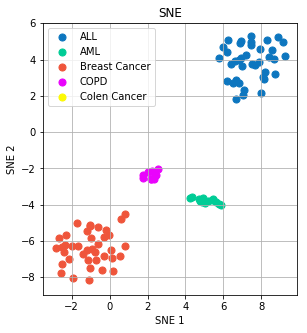

In [19]:
targets = [0,1,2,3,4]
diagnosis = ['ALL', 'AML', 'Breast Cancer', 'COPD', 'Colen Cancer']
colors = ['#0D76BF', '#00cc96', '#EF553B', '#E904FC', '#FCF904'] 
SNE(Data, 300, diagnosis, targets, colors)